In [13]:
import cfdnetplus
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [22]:
fields= ['U','p','k','omega', 'nut']
mainfolder='airfoil2d_real/airFoil_450_mse_adam/'
modelfolder='cfdnetplus_models/model_mse_adam_real'

xlim =[-50,50]
ylim = [-30 , 30]
xres=256
yres=66
zcut=0.05

In [23]:
folder='airfoil2d_real/airFoil_450_org/'
cfdnetplus.extractInput2d(folder,fields, xlim, ylim,xres,yres,zcut)
label=np.load(folder+'/input.npy')

airfoil2d_real/airFoil_450_org/
airFoil_450_2_0
airFoil_450_2_100
airFoil_450_2_1000
airFoil_450_2_1050
airFoil_450_2_1100
airFoil_450_2_1150
airFoil_450_2_1200
airFoil_450_2_1250
airFoil_450_2_1300
airFoil_450_2_1350
airFoil_450_2_1400
airFoil_450_2_1450
airFoil_450_2_1468
airFoil_450_2_150
airFoil_450_2_200
airFoil_450_2_250
airFoil_450_2_300
airFoil_450_2_350
airFoil_450_2_400
airFoil_450_2_450
airFoil_450_2_50
airFoil_450_2_500
airFoil_450_2_550
airFoil_450_2_600
airFoil_450_2_650
airFoil_450_2_700
airFoil_450_2_750
airFoil_450_2_800
airFoil_450_2_850
airFoil_450_2_900
airFoil_450_2_950
write airfoil2d_real/airFoil_450_org//input.npy


In [24]:
cfdnetplus.extractInput2d(mainfolder,fields, xlim, ylim,xres,yres,zcut)

airfoil2d_real/airFoil_450_mse_adam/
airFoil_450_mse_adam_0
airFoil_450_mse_adam_20
write airfoil2d_real/airFoil_450_mse_adam//input.npy


In [33]:
data=np.load(mainfolder+'/input.npy')

In [34]:
model = tf.keras.models.load_model(modelfolder,compile=False)
normal=np.load(modelfolder+'/normal.npy')  

In [35]:
data=data*1/normal
prediction=model.predict(data)
prediction=prediction*normal
np.save(mainfolder+'/pred',prediction)
data=data*normal

1/1 [==============================] - 0s 111ms/step


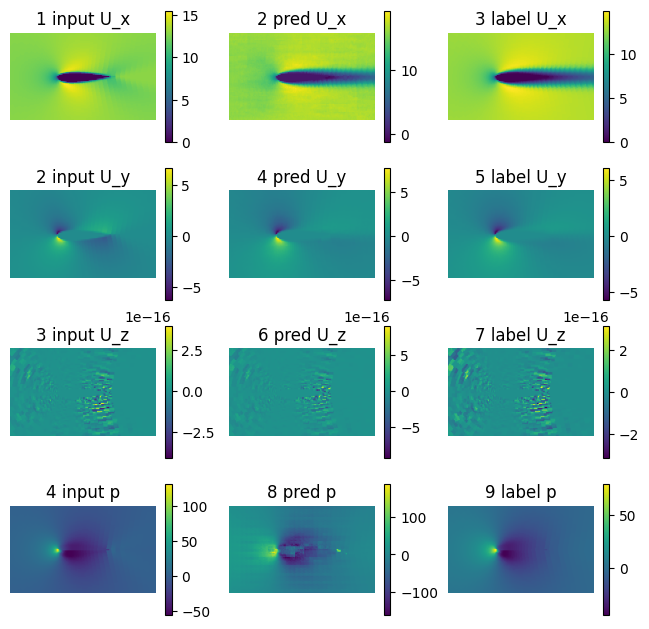

In [36]:
pred=np.load(mainfolder+'/pred.npy')

n=0
fig = plt.figure(figsize=(8, 14))
[a,b,c,d]=data.shape
titles= ['U_x','U_y','U_z','p','k','omega', 'nut']
titles= ['U_x','U_y','U_z','p']

col=3
for i in range(4):
    fig.add_subplot(d, col, (i*3)+1)
    plt.imshow(data[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title(str((i*1)+1) + ' input ' +titles[i])
    plt.axis('off')
    plt.colorbar()
    
    fig.add_subplot(d, col, (i*3)+2)
    plt.imshow(pred[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title(str((i*2)+2)+' pred '+titles[i])
    plt.axis('off')
    plt.colorbar()
    
    fig.add_subplot(d, col, (i*3)+3)
    plt.imshow(label[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title(str((i*2)+3)+' label '+titles[i])
    plt.axis('off')
    plt.colorbar()
    
  

plt.show()

In [10]:
cfdnetplus.pred2OF2D(mainfolder,fields,xlim,ylim)

airFoil_450_mse_adam_20
airFoil_450_temp_0
folder airfoil2d_real/airFoil_450_mse_adam//21 was created
write airfoil2d_real/airFoil_450_mse_adam//21/U
write airfoil2d_real/airFoil_450_mse_adam//21/p
write airfoil2d_real/airFoil_450_mse_adam//21/k
write airfoil2d_real/airFoil_450_mse_adam//21/omega
write airfoil2d_real/airFoil_450_mse_adam//21/nut
